# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [2]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#load and inspect the data

data = pd.read_csv('reg_data.csv')
print(data.head())
print('\n')
print(data.describe())
print('\n')
print(data.info())

   32.502345269453031  31.70700584656992
0           53.426804          68.777596
1           61.530358          62.562382
2           47.475640          71.546632
3           59.813208          87.230925
4           55.142188          78.211518


       32.502345269453031  31.70700584656992
count           99.000000          99.000000
mean            49.124564          73.149475
std              9.652463          16.216558
min             25.128485          41.412885
25%             41.648159          61.088576
50%             50.030174          72.247251
75%             56.798054          83.287411
max             70.346076         118.591217


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   32.502345269453031  99 non-null     float64
 1   31.70700584656992   99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None


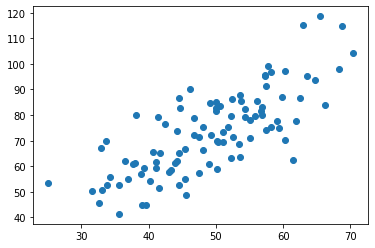

In [4]:
#plot the data

x = data.iloc[:,0]
y = data.iloc[:,1]

plt.scatter(x, y)

Write your inital observations below:

There seems to be a positive correlation between the given data. A line with intercept on the Y around 30 with a positive slope less than 45° (maybe something like 35?) seems reasonable.

In [5]:
#implement a least squares function to find a, b

def reg_line(x, y):
    # getting the means of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # initializing numerator and denominator for b
    b_num = 0
    b_den = 0

    # iterating over every element of X to get numerator and denominator
    for i in range(len(x)):
        b_num += (x[i] - x_mean) * (y[i] - y_mean)
        b_den += (x[i] - x_mean) ** 2

    # compute numerator and denominator to get b
    b = b_num / b_den

    # getting a
    a = y_mean - (b * x_mean)

    # predicting y points
    y_pred = a + (b * x)

    return y_pred

In [6]:
# class implementation

class LinearRegression:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.b = 0
        self.a = 0

    def fit(self, x, y):
        #getting x and y
        self.x = x
        self.y = y

        # getting the means of x and y
        x_mean = np.mean(self.x)
        y_mean = np.mean(self.y)

        # initializing numerator and denominator for b (numerator is covariance for x and y, denominator is variance for x)
        b_num = 0
        b_den = 0

        # iterating over every element of X to get numerator and denominator
        for i in range(len(self.x)):
            b_num += (self.x[i] - x_mean) * (self.y[i] - y_mean)
            b_den += (self.x[i] - x_mean) ** 2

        # compute numerator and denominator to get b
        self.b = b_num / b_den

        # getting a
        self.a = y_mean - (self.b * x_mean)
        
        return self

    def predict(self, x):
        # predicting y points
        y_pred = self.a + (self.b * x)
        return y_pred

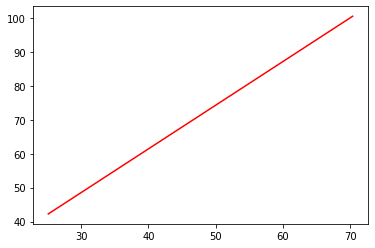

In [7]:
#plot the regression line as x and y

reg_line = reg_line(x,y)

plt.plot([min(x), max(x)], [min(reg_line), max(reg_line)], color = 'red')

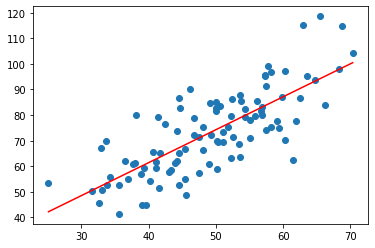

In [8]:
#plot the original data with the regression line as defined by your function

plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(reg_line), max(reg_line)], color = 'red')

Write your final observations below:



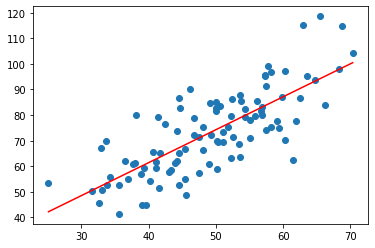

In [9]:
# plotting regression line with class

reg = LinearRegression()
reg.fit(x, y)
class_reg_line = reg.predict(x)

plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(class_reg_line), max(class_reg_line)], color = 'red')